# History

**2021-11-05:**
- Initial version. New competition. No open tasks.

# Purpose

The objective of the **stage one** notebook is to analyze and understand the dataset and toidentify potential todos for data normalization, transformation, and feature selection. We also optimize the dataframes to reduce storage and memory usage.

# Setup environment

## Import basic modules

In [1]:
import os # for cpu count
import configparser # to load standard config.ini
import pandas as pd
import matplotlib.pyplot as plt
from typing import List # for dataframe optimization

%load_ext watermark
%matplotlib inline


## Define parameters

In [3]:
# Load external config file
config = configparser.ConfigParser()
config.read("../src/config.ini")

# Paths
PATH_DATA_RAW = config["PATHS"]["PATH_DATA_RAW"]
PATH_DATA_INT = config["PATHS"]["PATH_DATA_INT"]
PATH_DATA_PRO = config["PATHS"]["PATH_DATA_PRO"]
PATH_REPORTS = config["PATHS"]["PATH_REPORTS"]

# Telegram Bot
token = config["TELEGRAM"]["token"]
chat_id = config["TELEGRAM"]["chat_id"]
FILENAME_NB = "01_load-analyze-optimize" # for Telegram messages

# Set global randome state
rnd_state = 42

# Define available cpu cores
n_cpu = os.cpu_count()
print("Number of CPUs used:", n_cpu)


Number of CPUs used: 16


# Load data

In [4]:
df_train = pd.read_csv(PATH_DATA_RAW+'train.csv') # for EDA and optimization
df_test = pd.read_csv(PATH_DATA_RAW+'test.csv') # for optimization only

# Review dataframe details

In [5]:
df_train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,...,0,1,0,0,0,0,0,0,0,1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,...,0,1,0,0,0,0,0,0,0,1
2,2,0.182583,0.307431,0.325950,0.207116,0.605699,0.309695,0.493337,0.751107,0.536272,...,0,0,0,1,1,0,0,0,0,1
3,3,0.180240,0.494592,0.008367,0.223580,0.760618,0.439211,0.432055,0.776147,0.483958,...,0,0,0,0,1,0,0,0,0,1
4,4,0.177172,0.495513,0.014263,0.548819,0.625396,0.562493,0.117158,0.561255,0.077115,...,0,1,1,0,1,0,0,1,0,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 287 entries, id to target
dtypes: float64(240), int64(47)
memory usage: 2.1 GB


In [8]:
#df_train.select_dtypes(exclude=['float64'])
#df_train.select_dtypes(exclude=['int64'])

# Review data distribution

## Review Features of dtype "float64"

In [9]:
df_train_float64 = df_train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64'])
df_train_num_features = df_train_float64.columns
df_train_num_features.to_frame(name='num_features').sort_values('num_features').to_csv(PATH_DATA_INT+'num_features.csv', index=False)

### Describe

In [10]:
df_train_float64.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,1000000.0,0.214334,0.053320,0.041790,0.181676,0.204498,0.229684,1.000000
f1,1000000.0,0.460218,0.101316,0.022016,0.389215,0.453893,0.526023,0.959019
f2,1000000.0,0.129253,0.120805,0.000381,0.017692,0.095496,0.177717,0.994818
f3,1000000.0,0.277598,0.063163,0.000000,0.235342,0.264669,0.305837,0.979797
f4,1000000.0,0.580710,0.115338,0.000000,0.497938,0.565059,0.657024,1.000000
...,...,...,...,...,...,...,...,...
f237,1000000.0,0.020571,0.073547,0.000114,0.005004,0.006707,0.008481,1.000000
f238,1000000.0,0.171748,0.057980,0.015935,0.138110,0.156161,0.188783,1.000000
f239,1000000.0,0.228530,0.138197,0.001260,0.197519,0.202545,0.362163,0.987972
f240,1000000.0,0.187746,0.061176,0.011777,0.142875,0.170167,0.199849,0.937160


In [11]:
df_train_float64.describe().T['max'].value_counts()

1.000000    42
0.986195     2
0.443871     1
0.994872     1
0.971165     1
            ..
0.973533     1
0.993359     1
0.999698     1
0.913656     1
0.988138     1
Name: max, Length: 198, dtype: int64

### Histogram

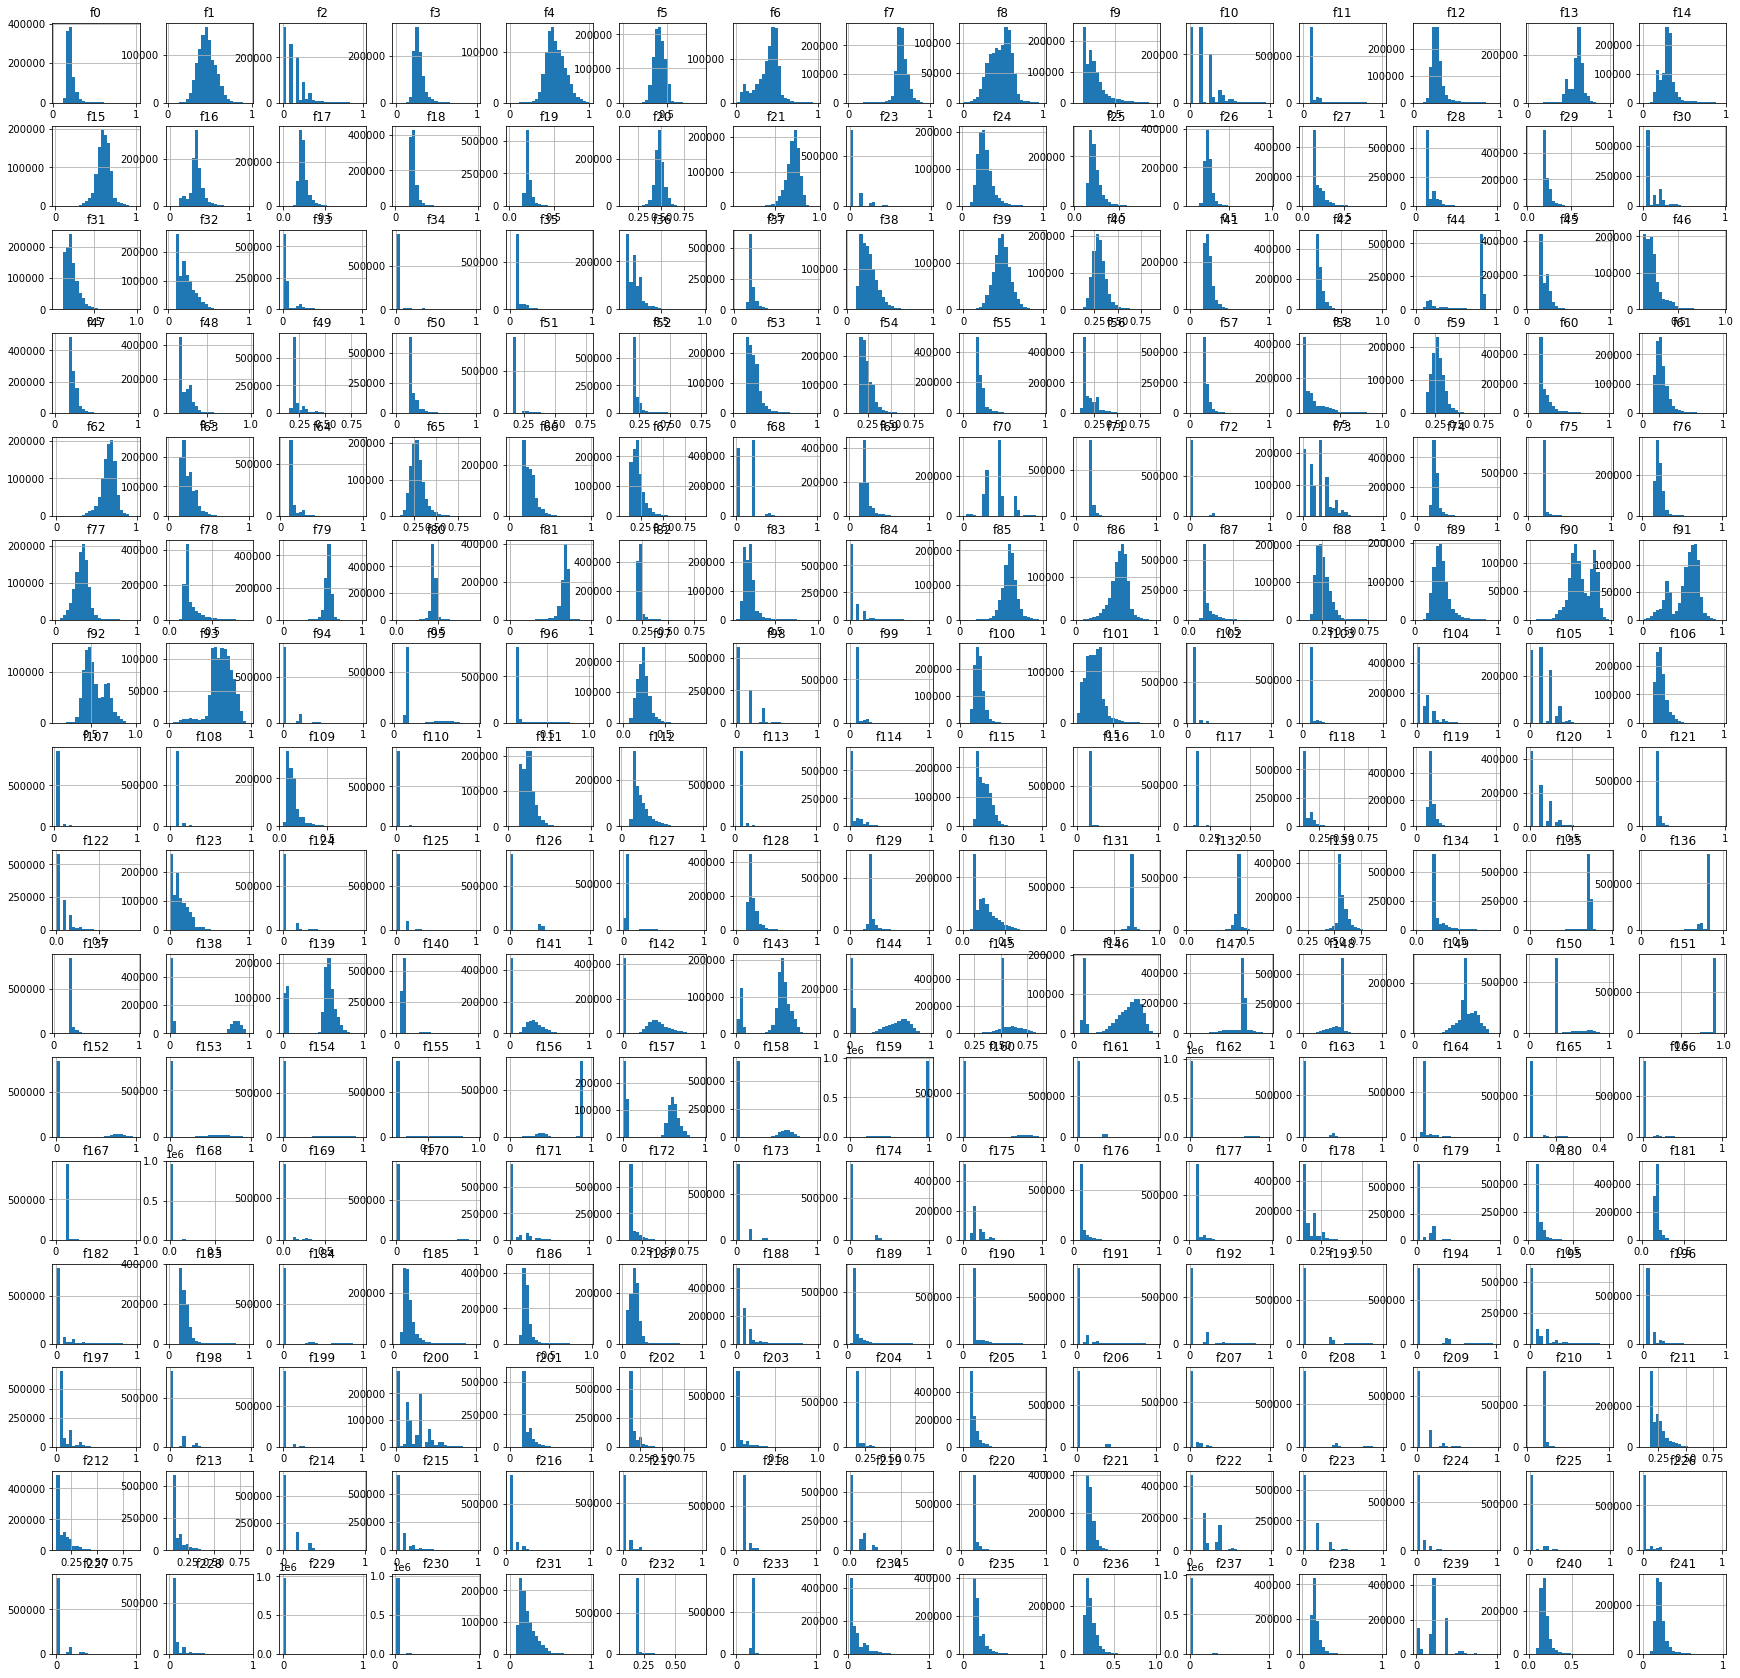

In [12]:
df_train_float64.hist(bins=25, figsize=(30,30))
plt.show()

### Skewness 

Checking skewness based on histograms.

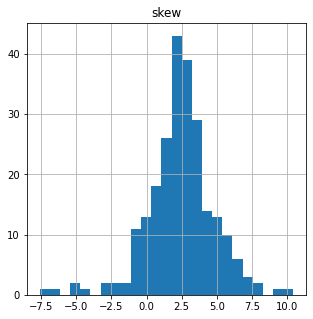

In [13]:
# skewness along the index axis
df_train_float64.skew(axis = 0, skipna = True).to_frame('skew').hist(bins=25, figsize=(5,5))
plt.show()

### Correlation 

In [14]:
#corr = df_train_float64.corr()
#corr.style.background_gradient(cmap='coolwarm')

### Conclusion
- All features have the same range/scale between 0 and 1. Normalization does not seem necessary.
- Remove features with less data (low variance).
- Some features are highly skewed.


In [15]:
# TODO: **Discard features that have low variance.**
# TODO: **Transform (Power Transform) features to address skewness.**

TODO: Transform (Power Transform) features.

## Review features of dtype "int64"

In [16]:
df_train_int64 = df_train.drop(['id','target'], axis=1).select_dtypes(exclude=['float64'])

In [17]:
df_train_cat_features = df_train_int64.columns
#df_train_cat_features.to_csv(PATH_DATA_INT+'cat_features.csv', index=False)
#df_train_cat_features.tolist()
df_train_cat_features.to_frame(name='cat_features').sort_values('cat_features').to_csv(PATH_DATA_INT+'cat_features.csv', index=False)

### Describe

In [18]:
df_train_int64.describe().T

,count,mean,std,min,25%,50%,75%,max
f22,1000000.0,0.548061,0.497685,0.0,0.0,1.0,1.0,1.0
f43,1000000.0,0.235521,0.424324,0.0,0.0,0.0,0.0,1.0
f242,1000000.0,0.332073,0.470957,0.0,0.0,0.0,1.0,1.0
f243,1000000.0,0.213172,0.409548,0.0,0.0,0.0,0.0,1.0
f244,1000000.0,0.442970,0.496737,0.0,0.0,0.0,1.0,1.0
f245,1000000.0,0.650685,0.476754,0.0,0.0,1.0,1.0,1.0
f246,1000000.0,0.804147,0.396856,0.0,1.0,1.0,1.0,1.0
f247,1000000.0,0.679138,0.466808,0.0,0.0,1.0,1.0,1.0
f248,1000000.0,0.279384,0.448697,0.0,0.0,0.0,1.0,1.0
f249,1000000.0,0.408040,0.491471,0.0,0.0,0.0,1.0,1.0


In [19]:
df_train_int64.describe().T['max'].value_counts()

1.0    45
Name: max, dtype: int64

### Histogram

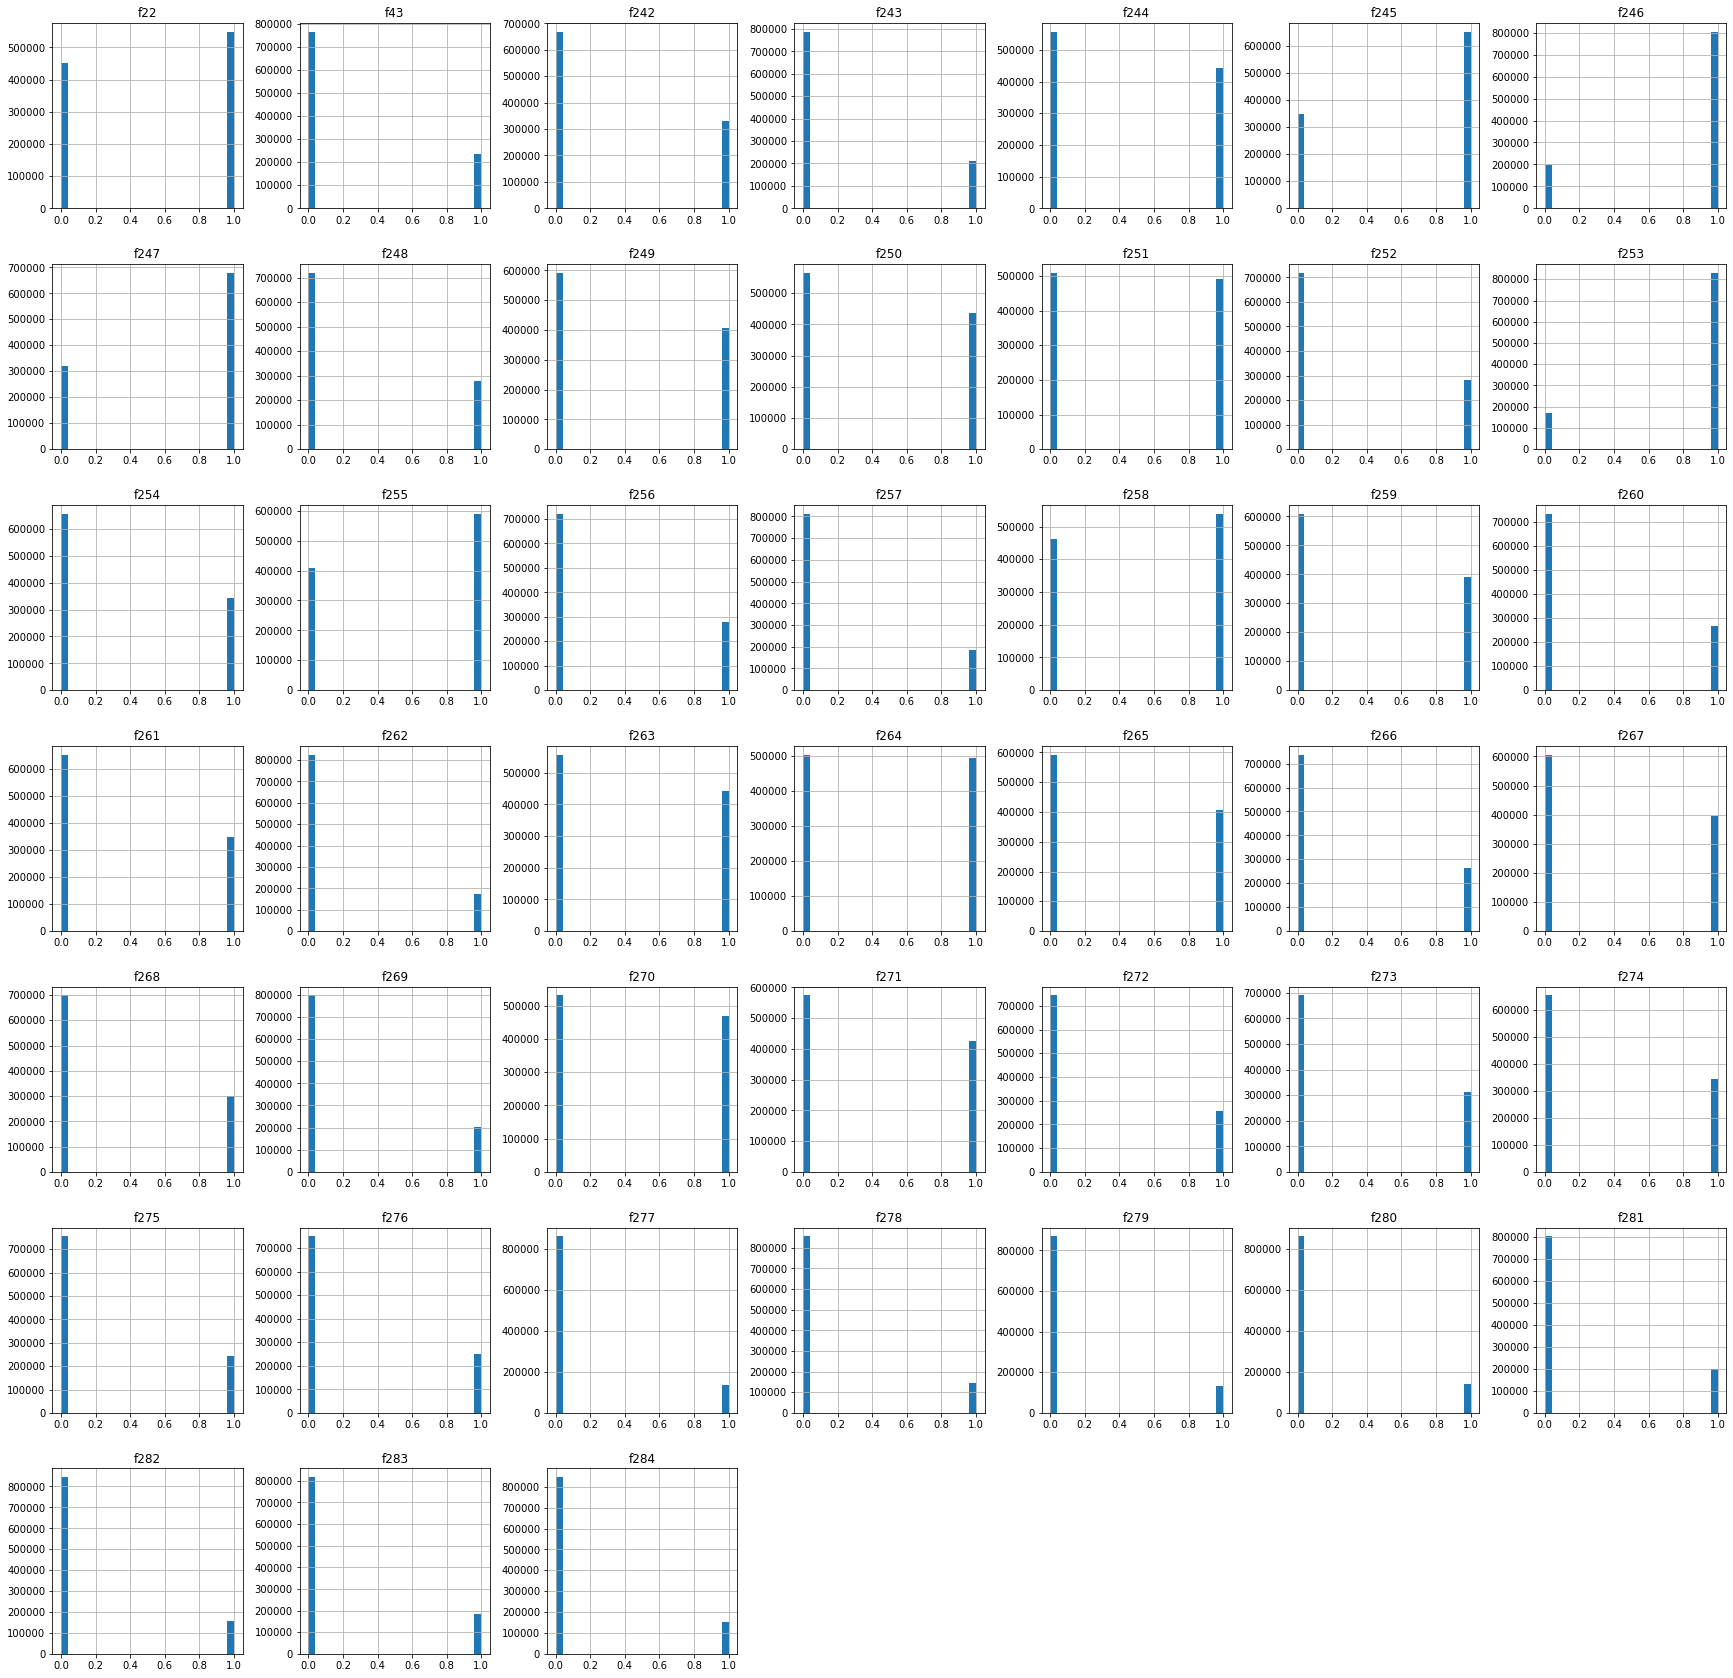

In [20]:
df_train_int64.hist(bins=25, figsize=(30,30))
plt.show()

### Correlation

In [21]:
#corr = df_train_int64.corr()
#corr.style.background_gradient(cmap='coolwarm', axis=None)

In [22]:
"""
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(3))
"""

"\n# Fill diagonal and upper half with NaNs\nmask = np.zeros_like(corr, dtype=bool)\nmask[np.triu_indices_from(mask)] = True\ncorr[mask] = np.nan\n(corr\n .style\n .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)\n .highlight_null(null_color='#f1f1f1')  # Color NaNs grey\n .set_precision(3))\n"

## Review target value

In [23]:
df_train['target'].value_counts()

1    500485
0    499515
Name: target, dtype: int64

### Conclusion
- Target values point to **classification** problem (0 or 1).
- The target is almost evenly distributed between the two classes. **No imbalance.**

# Optimize and save dataframes

## Optimize memory (and space) usage

In [24]:
def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    floats = df.select_dtypes(include=["float64"]).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast="float")
    return df


def optimize_ints(df: pd.DataFrame) -> pd.DataFrame:
    ints = df.select_dtypes(include=["int64"]).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast="integer")
    return df


def optimize_objects(df: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    for col in df.select_dtypes(include=["object"]):
        if col not in datetime_features:
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if float(num_unique_values) / num_total_values < 0.5:
                df[col] = df[col].astype("category")
        else:
            df[col] = pd.to_datetime(df[col])
    return df


def optimize(df: pd.DataFrame, datetime_features: List[str] = []):
    return optimize_floats(optimize_ints(optimize_objects(df, datetime_features)))


In [25]:
df_train = optimize(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 287 entries, id to target
dtypes: float32(240), int32(1), int8(46)
memory usage: 963.2 MB


In [26]:
df_test = optimize(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 286 entries, id to f284
dtypes: float32(240), int32(1), int8(45)
memory usage: 481.1 MB


## Save optimize dataframes

In [27]:
# opt for optimized
FILENAME = "train-opt.pkl"
df_train.to_pickle(PATH_DATA_INT + FILENAME)

FILENAME = "test-opt.pkl"
df_test.to_pickle(PATH_DATA_INT + FILENAME)


# Watermark

In [28]:
%watermark

Last updated: 2021-11-05T21:12:31.810856+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [29]:
%watermark --iversions

pandas    : 1.3.4
sys       : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:15:42) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.4.3

